# House Prices - EDA and Regression

Desc
- The value of a house is influenced by a myriad of factors that collectively shape its market price. The location of a property, encompassing its neighborhood and proximity to amenities, plays a pivotal role, with desirable locales often commanding higher prices.
- The size and layout of a house, including the number of bedrooms and bathrooms, contribute to its overall appeal, as does the condition and quality of construction materials. The age of the property and any recent renovations or updates are crucial considerations, as newer or modernized homes tend to be valued more highly. Outdoor features such as a well-kept yard, a pool, or additional recreational spaces can enhance a property's attractiveness. Unique characteristics and special features, along with energy-efficient elements, may also positively impact house prices.
- Factors like the presence of a garage and sufficient parking space, as well as broader market conditions such as supply and demand, further contribute to the dynamic landscape of real estate pricing. In essence, the interplay of these diverse elements shapes the perceived value of a property in the housing market.

Import libraries and modul

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
import os

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor


Load Dataset

In [3]:
train=pd.read_csv('train.csv') # Load train dataset into dataframe

In [4]:
test=pd.read_csv('test.csv') # Load test dataset into dataframe

In [5]:
submission=pd.read_csv('sample_submission.csv') # Load submission dataset into dataframe

# Data Exploration

In [6]:
print('Shape of train dataset: ',train.shape)
train.head()

Shape of train dataset:  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1. **Target Variable:**
   - SalePrice: Sale price of the property in dollars.

2. **Building Information:**
   - MSSubClass: Building class of the property.

3. **Zoning Information:**
   - MSZoning: General zoning classification of the property.

4. **Property Size:**
   - LotFrontage: Linear feet of street connected to the property.
   - LotArea: Size of the lot in square feet.

5. **Access Information:**
   - Street: Type of road access.
   - Alley: Type of alley access to the property.

6. **Property Shape and Flatness:**
   - LotShape: General shape of the property.
   - LandContour: Flatness of the property.

7. **Utilities:**
   - Utilities: Type of utilities available in the property.

8. **Location Information:**
   - Neighborhood: Physical locations within the Ames city limits.

9. **Overall Property Quality and Condition:**
   - OverallQual: Overall material and finish quality.
   - OverallCond: Overall condition rating of the property.

10. **Construction and Remodeling:**
    - YearBuilt: Original construction date.
    - YearRemodAdd: Remodel date of the property.

11. **Roof Information:**
    - RoofStyle: Type of roof.
    - RoofMatl: Roofing material.

12. **Exterior Information:**
    - Exterior1st: Exterior covering on the house.
    - Exterior2nd: Additional exterior covering if applicable.

13. **Basement Information:**
    - BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF: Various details about the basement.

14. **Heating and Air Conditioning:**
    - Heating: Type of heating.
    - HeatingQC: Heating quality and condition.
    - CentralAir: Whether the property has central air conditioning.

15. **Electrical Information:**
    - Electrical: Description of the electrical system in the house.

16. **Floor and Living Area Information:**
    - 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea: Square footage of different floors and above-grade living area.

17. **Bathroom Information:**
    - BsmtFullBath, BsmtHalfBath, FullBath, HalfBath: Number of bathrooms on different levels.

18. **Bedroom and Kitchen Information:**
    - Bedroom, Kitchen, KitchenQual, TotRmsAbvGrd: Number of bedrooms, kitchens, and kitchen quality.

19. **Functional Rating:**
    - Functional: Home's functionality rating.

20. **Fireplace Information:**
    - Fireplaces: Number of fireplaces.
    - FireplaceQu: Quality of the fireplace.

21. **Garage Information:**
    - GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond: Details about the garage.

22. **Driveway Information:**
    - PavedDrive: Whether the property has a paved driveway.

23. **Porch Information:**
    - WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch: Square footage of different types of porches.

24. **Pool Information:**
    - PoolArea, PoolQC: Information about the pool area and its quality.

25. **Fence Quality:**
    - Fence: Quality of the fence.

26. **Miscellaneous Features:**
    - MiscFeature, MiscVal: Miscellaneous features not covered in other categories and their corresponding values.

27. **Sale Information:**
    - MoSold, YrSold: Month and year the property was sold.
    - SaleType, SaleCondition: Type of sale and the condition of the sale.


In [7]:
# Drop the 'Id' column from the 'train' DataFrame and modify it in place
train.Id = train.drop(columns=['Id'], axis=1, inplace=True)


In [8]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Visualization

In [9]:
# Define the target variable
target = 'SalePrice'

# Function to categorize columns into numerical and categorical
def col_dtypes(train, target):
    num_col = train.select_dtypes('number').columns.to_list() # Select numerical columns
    cat_col = train.select_dtypes("object").columns.to_list() # Select categorical columns
    
    num_col = [col for col in num_col if col != target] # Exclude the target variable from numerical columns

    return num_col, cat_col

num_col, cat_col = col_dtypes(train, target) # Apply the function to the 'train' DataFrame

# Print the resulting lists of numerical and categorical columns
print(f'Numerical Columns: {num_col}', end='\n\n')
print(f"Categorical Columns: {cat_col}")


Numerical Columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Categorical Columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',

In [10]:
train["SalePrice"].quantile([0,0.25,0.50,0.75,0.99])

0.00     34900.00
0.25    129975.00
0.50    163000.00
0.75    214000.00
0.99    442567.01
Name: SalePrice, dtype: float64

In [11]:
# Create a new categorical column 'SalePrice_Range' in the 'train' DataFrame
train["SalePrice_Range"] = pd.cut(
    train["SalePrice"],                     # Specify the column to be binned
    bins=np.array([-np.inf, 100, 150, 200, np.inf]) * 1000,  # Define the bin edges in thousands
    labels=["0-100k", "100k-150k", "150k-200k", "200k+"]    # Assign labels to the bins
)

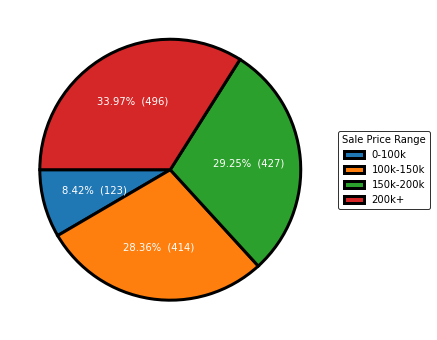

In [12]:
# Visualization: Pie chart for 'SalePrice_Range' distribution
labels = ["0-100k", "100k-150k", "150k-200k", "200k+"]
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

value_count = train["SalePrice_Range"].value_counts() # Count occurrences of each category in 'SalePrice_Range'
data = [value_count[0], value_count[1], value_count[2], value_count[3]]# Prepare data for the pie chart

# Plot the pie chart
plt.pie(
    [train["SalePrice_Range"].value_counts(ascending=True).values[0],
     train["SalePrice_Range"].value_counts(ascending=True).values[1],
     train["SalePrice_Range"].value_counts(ascending=True).values[2],
     train["SalePrice_Range"].value_counts(ascending=True).values[3]],
    textprops=dict(size=10, color="white"),  # Set text properties
    autopct=lambda p: '{:.2f}%  ({:,.0f})'.format(p, p * sum(data) / 100),  # Format autopct
    startangle=180,  # Set the starting angle for the pie chart
    wedgeprops=dict(edgecolor="black", linewidth=3)  # Set properties for wedge edges
)

# Add legend and title
plt.legend(labels, title="Sale Price Range", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="black")


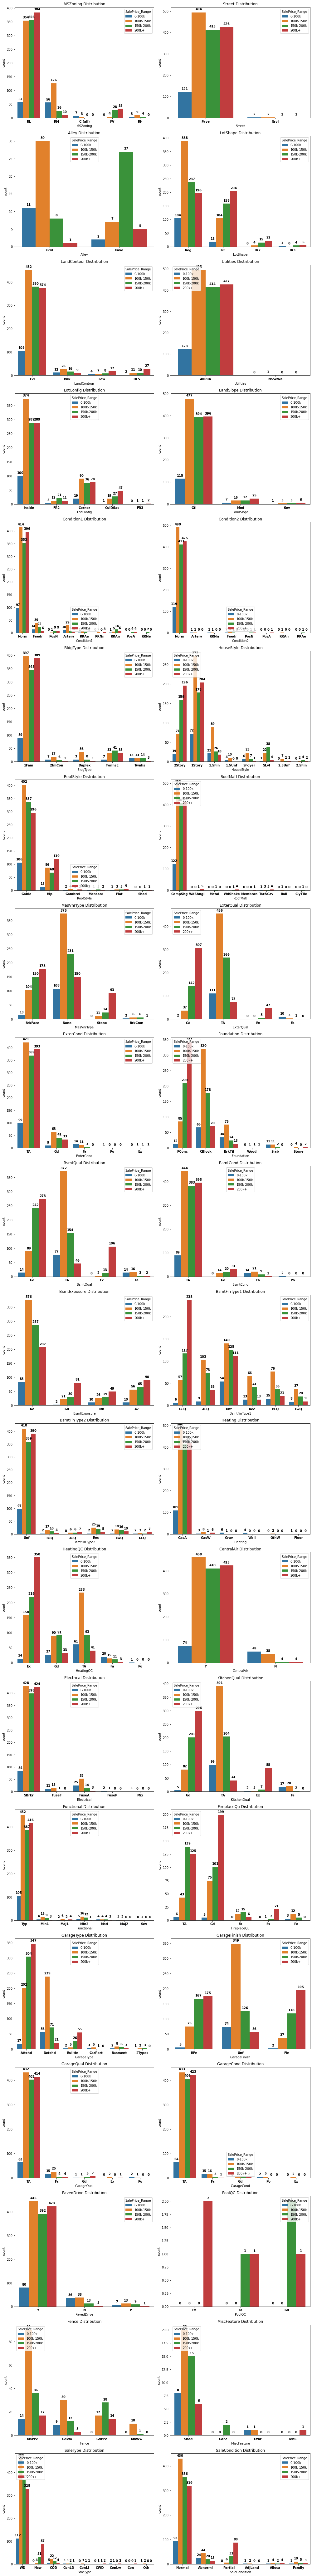

In [13]:
# Filter categorical columns with less than 10 unique values
cat_col = train[cat_col].columns[train[cat_col].nunique() < 10]

# Create subplots for categorical column distribution
plt.figure(figsize=(14, len(cat_col) * 3))
for idx, column in enumerate(cat_col):
    plt.subplot(len(cat_col)//2 + 1, 2, idx + 1)
    
    sns.countplot(hue="SalePrice_Range", x=column, data=train) # Plot count distribution with respect to 'SalePrice_Range'
    
    # Annotate each bar with the count value (as integer), handling NaN
    for p in plt.gca().patches:
        count_value = int(p.get_height()) if not np.isnan(p.get_height()) else 0
        plt.gca().annotate(f'{count_value}', (p.get_x() + p.get_width() / 2., count_value),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')
    
    plt.title(f"{column} Distribution") # Set plot title
    
    plt.xticks(fontweight='bold') # Set x-axis tick labels to bold
    
    plt.tight_layout() # Ensure tight layout


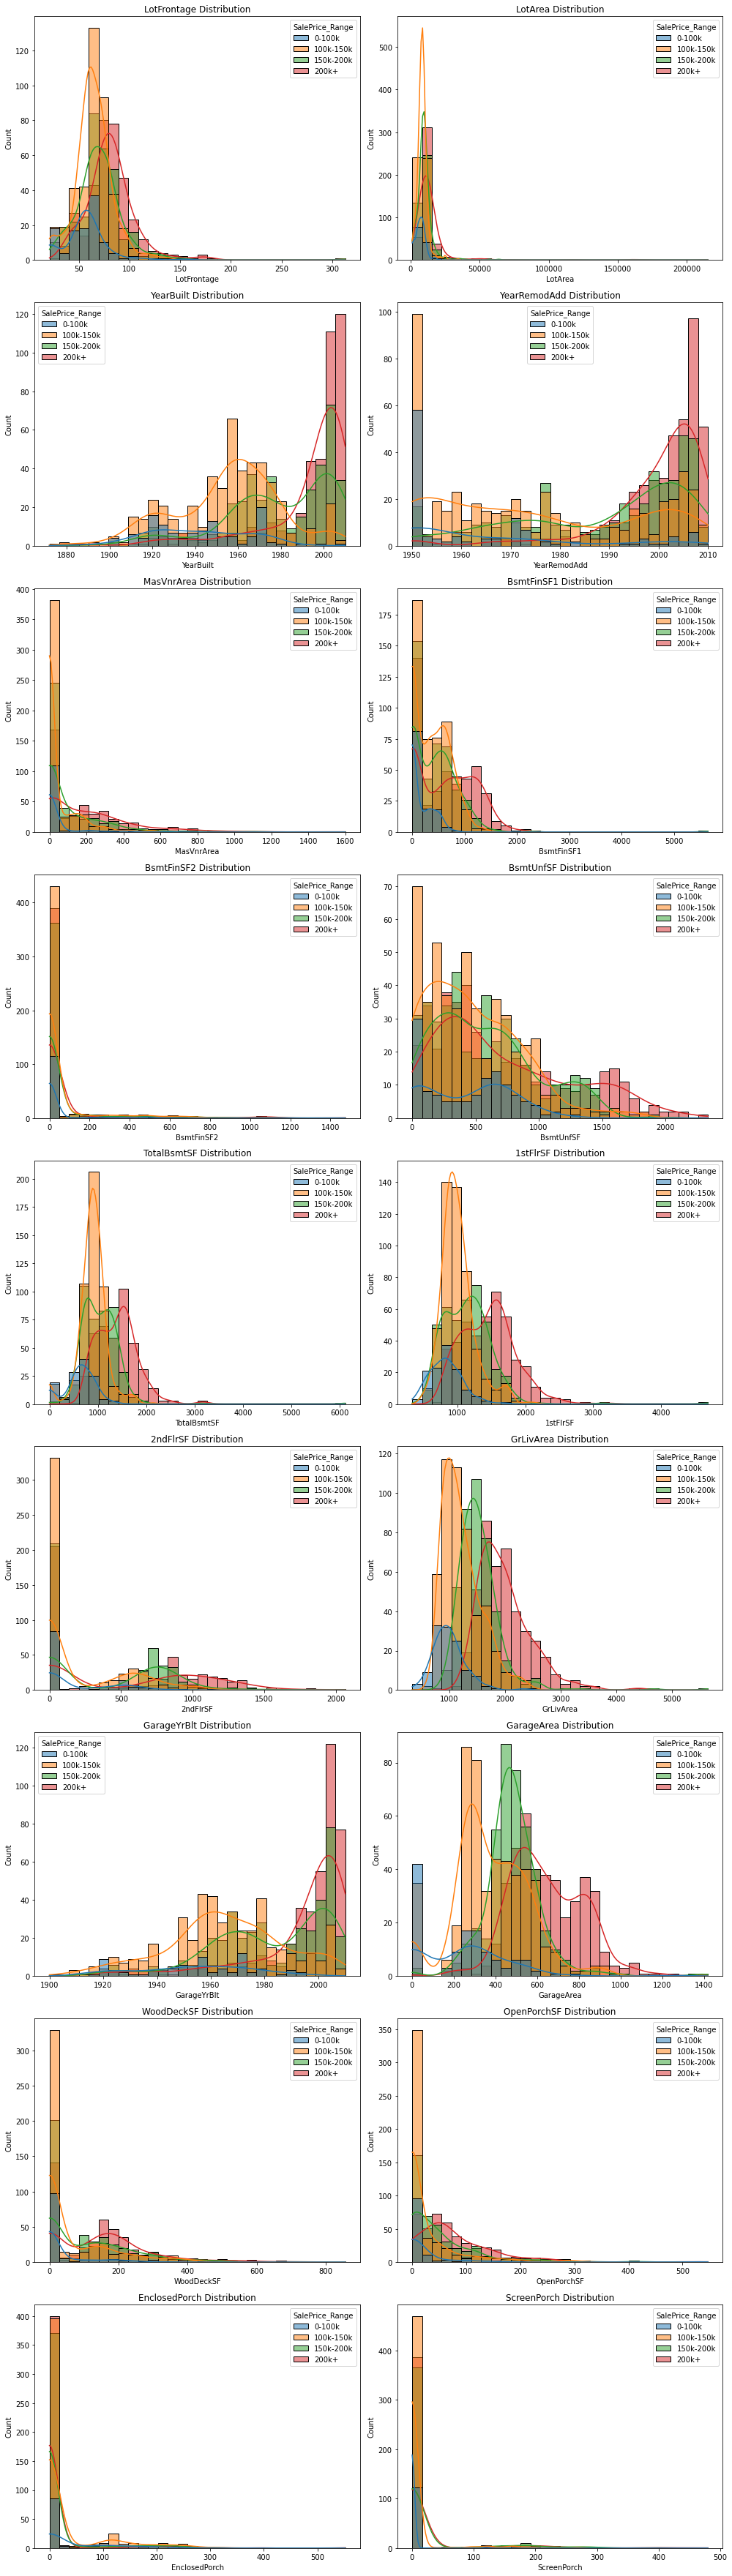

In [14]:
# Filter numerical columns with more than 25 unique values
num_col = train[num_col].columns[train[num_col].nunique() > 25]

# Create subplots for numerical column distribution
plt.figure(figsize=(14, len(num_col) * 3))
for idx, column in enumerate(num_col):
    plt.subplot(len(num_col)//2 + 1, 2, idx + 1)
    
    sns.histplot(x=column, hue="SalePrice_Range", data=train, bins=30, kde=True)# Plot histogram with respect to 'SalePrice_Range'
    
    plt.title(f"{column} Distribution") # Set plot title
    plt.tight_layout() # Ensure tight layout

# Data Preparation

In [15]:
df = pd.read_csv('train.csv')

In [16]:
missing_data=df.isna().sum()
missing_data = missing_data[missing_data>0]
missing_data

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Missing value for the categorical column can be replaced with 'NA'. 'NA' means not available

In [17]:
# List of columns to fill with 'Unknown'
columns_to_fill = ['Alley',  'MiscFeature','PoolQC','Fence','FireplaceQu',
                   'GarageType', 'GarageFinish','GarageQual', 'GarageCond', 'MasVnrType', 
                   'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual']

# Fill missing values with 'Unknown'
df[columns_to_fill] = df[columns_to_fill].fillna('Unknown')

In [18]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median()) #This missing value can be replaced with median or mean LotFrontage of the neighborhood
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [19]:
missing_data=df.isna().sum()
missing_data = missing_data[missing_data>0]
missing_data

Series([], dtype: int64)

In [20]:
# Select numerical columns of type int64 or float64
numeric_col = df.select_dtypes('number').columns.tolist()

# Check for columns containing negative values
count_negative = df[numeric_col].apply(lambda x: (x < 0).sum())
count_negative = count_negative[count_negative > 0]
count_negative

Series([], dtype: int64)

In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Unknown,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000


In [22]:
df = df.drop(columns=['Id'])

In [23]:
df = df.drop(columns=['Neighborhood','Condition1','Condition2'])

In [24]:
le=LabelEncoder()
label_mapping = {}
catcol=[col for col in df.columns if df[col].dtype == 'object']
for col in catcol:
    df[col]=le.fit_transform(df[col])
    label_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

label_mapping


{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4},
 'Street': {'Grvl': 0, 'Pave': 1},
 'Alley': {'Grvl': 0, 'Pave': 1, 'Unknown': 2},
 'LotShape': {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3},
 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3},
 'Utilities': {'AllPub': 0, 'NoSeWa': 1},
 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'BldgType': {'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4},
 'HouseStyle': {'1.5Fin': 0,
  '1.5Unf': 1,
  '1Story': 2,
  '2.5Fin': 3,
  '2.5Unf': 4,
  '2Story': 5,
  'SFoyer': 6,
  'SLvl': 7},
 'RoofStyle': {'Flat': 0,
  'Gable': 1,
  'Gambrel': 2,
  'Hip': 3,
  'Mansard': 4,
  'Shed': 5},
 'RoofMatl': {'ClyTile': 0,
  'CompShg': 1,
  'Membran': 2,
  'Metal': 3,
  'Roll': 4,
  'Tar&Grv': 5,
  'WdShake': 6,
  'WdShngl': 7},
 'Exterior1st': {'AsbShng': 0,
  'AsphShn': 1,
  'BrkComm': 2,
  'BrkFace': 3,
  'CBlock': 4,
  'CemntBd': 5,
  'HdBoard': 6,
  'Im

Correlation

In [25]:
df2=df.corr().SalePrice.reset_index().sort_values(by='SalePrice',ascending=False).head(10)
df2

,index,SalePrice
76,SalePrice,1.000000
13,OverallQual,0.790982
42,GrLivArea,0.708624
57,GarageCars,0.640409
58,GarageArea,0.623431
34,TotalBsmtSF,0.613581
39,1stFlrSF,0.605852
45,FullBath,0.560664
50,TotRmsAbvGrd,0.533723
15,YearBuilt,0.522897


<AxesSubplot:>

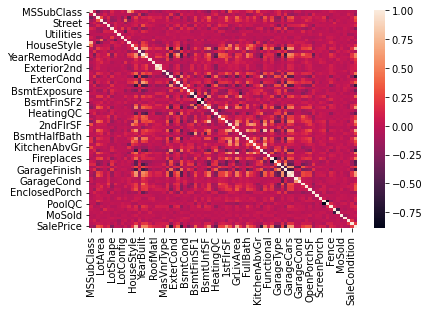

In [26]:
sns.heatmap(df.corr(),)

Split train test

In [27]:
X=df.drop(['SalePrice'],1)
y=df['SalePrice'].values.reshape(-1,1)

In [28]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
train_X.shape,train_y.shape

((1168, 76), (1168, 1))

# Modelling

In [30]:
catboost_model = CatBoostRegressor(silent=True,loss_function='RMSE')
catboost_model.fit(train_X,train_y)
cat_crosval=cross_val_score(catboost_model,X,y,cv=5)
print('Crosval: ', cat_crosval)

Crosval:  [0.90535257 0.83540175 0.88901076 0.91754839 0.85155965]


In [31]:
catboost_pred = catboost_model.predict(test_X)

catmae=mean_absolute_error(test_y,catboost_pred)
catmse=mean_squared_error(test_y,catboost_pred)
catrmse=mean_squared_error(test_y,catboost_pred,squared=False)
catmape=mean_absolute_percentage_error(test_y,catboost_pred)
catr2 = r2_score(test_y, catboost_pred)

print('MAE: ',catmae)
print('MSE: ',catmse)
print('RMSE: ',catrmse)
print('MAPE: ',catmape)
print('r2: ',catr2)

MAE:  16492.084976859365
MSE:  886835287.8370928
RMSE:  29779.77984870091
MAPE:  0.09061283074285172
r2:  0.8715820221320066


In [32]:
test_y = test_y.reshape(-1)
compare_cat = pd.DataFrame( {'Actual' : test_y.flatten() ,
                        'Predictions' : catboost_pred.flatten() ,
                        'Error percentage' : (catboost_pred.flatten() - test_y.flatten()) / test_y.flatten() *100} )

compare_cat.head(20)

,Actual,Predictions,Error percentage
0,200624,225493.520213,12.396084
1,133000,162340.447268,22.060487
2,110000,106559.358417,-3.127856
3,192000,213952.183416,11.433429
4,88000,89422.788479,1.616805
5,85000,92658.958186,9.010539
6,282922,243427.329168,-13.959562
7,141000,137208.855828,-2.688755
8,745000,495804.230352,-33.449097
9,148800,153736.599823,3.317607


In [33]:
linreg=LinearRegression()
linreg.fit(train_X,train_y)
crosval_lin=cross_val_score(linreg,X,y,cv=5)
print('Score: ', crosval_lin)

Score:  [0.86180339 0.80604666 0.85542944 0.84470612 0.64137176]


In [34]:
linregpred=linreg.predict(test_X)

linmae=mean_absolute_error(test_y,linregpred)
linmse=mean_squared_error(test_y,linregpred)
linrmse=mean_squared_error(test_y,linregpred,squared=False)
linmape=mean_absolute_percentage_error(test_y,linregpred)
linr2 = r2_score(test_y, linregpred)

print('MAE: ',linmae)
print('MSE: ',linmse)
print('RMSE: ',linrmse)
print('MAPE: ',linmape)
print('r2: ',linr2)

MAE:  21731.94714801319
MSE:  2378766566.6887155
RMSE:  48772.60057336204
MAPE:  0.12707430768431754
r2:  0.6555432598321813


In [35]:
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(train_X,train_y)
crosval_dtr=cross_val_score(dtr,X,y,cv=5)
print('Score: ',crosval_dtr)

Score:  [0.71747697 0.77385331 0.82830889 0.73393531 0.63445773]


In [36]:
dtrpred=dtr.predict(test_X)
dtrmae=mean_absolute_error(test_y,dtrpred)
dtrmse=mean_squared_error(test_y,dtrpred)
dtrrmse=mean_squared_error(test_y,dtrpred,squared=False)
dtrmape=mean_absolute_percentage_error(test_y,dtrpred)
dtrr2 = r2_score(test_y,dtrpred)

print('MAE: ',dtrmae)
print('MSE: ',dtrmse)
print('RMSE: ',dtrrmse)
print('MAPE: ',dtrmape)
print('r2:',dtrr2)


MAE:  26383.763698630137
MSE:  1594906783.4623287
RMSE:  39936.28404674537
MAPE:  0.15020199667292197
r2: 0.7690498936733771


In [37]:
rfc=RandomForestRegressor()
rfc.fit(train_X,train_y)
crosval_rfc = cross_val_score(rfc, X, y,cv=5)
print('Score: ',crosval_rfc)

Score:  [0.86189364 0.84944594 0.87057775 0.8834764  0.81675712]


In [38]:
rfcpred=rfc.predict(test_X)
rfcmae=mean_absolute_error(test_y,rfcpred)
rfcmse=mean_squared_error(test_y,rfcpred)
rfcrmse=mean_squared_error(test_y,rfcpred,squared=False)
rfcmape=mean_absolute_percentage_error(test_y,rfcpred)
rfcr2 = r2_score(test_y,rfcpred)
print('MAE: ',rfcmae)
print('MSE: ',rfcmse)
print('RMSE: ',rfcrmse)
print('MAPE: ',rfcmape)
print('r2:',rfcr2)

MAE:  17774.67770547945
MSE:  1126955314.0702105
RMSE:  33570.15510941542
MAPE:  0.09869481706858241
r2: 0.8368114975065466


In [39]:
results = pd.DataFrame([
    ['Catboost', catmape,catr2],
    ['Linear Regression',linmape,linr2],
    ['DecisionTreeRegressor',dtrmape,dtrr2],
    ["RandomForestRegressor",rfcmape,rfcr2]
], columns=['Model', 'MAPE', 'r2 Score'])

results.sort_values(by=['r2 Score'],ascending=False)

,Model,MAPE,r2 Score
0,Catboost,0.090613,0.871582
3,RandomForestRegressor,0.098695,0.836811
2,DecisionTreeRegressor,0.150202,0.769050
1,Linear Regression,0.127074,0.655543


# Submission

In [40]:
df_test = test

In [41]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
missing_data_test=df_test.isna().sum()
missing_data_test = missing_data_test[missing_data_test>0]
missing_data_test.sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [43]:
# List of columns to fill with 'Unknown'
columns_to_fill = ['Alley',  'MiscFeature','PoolQC','Fence','FireplaceQu',
                   'GarageType', 'GarageFinish','GarageQual', 'GarageCond', 'MasVnrType', 
                   'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual']

# Fill missing values with 'Unknown'
df_test[columns_to_fill] = df_test[columns_to_fill].fillna('Unknown')

df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].median()) #This missing value can be replaced with median or mean LotFrontage of the neighborhood
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(0)
df_test['Electrical']=df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])


In [44]:
# List of columns to fill with 'Unknown'
columns_to_fill = [ 'MSZoning','Utilities','Exterior1st',    
    'Exterior2nd','KitchenQual','Functional','SaleType',]

# Fill missing values with 'Unknown'
df_test[columns_to_fill] = df_test[columns_to_fill].fillna('Unknown')

In [45]:
# List of columns to fill with 'Unknown'
columns_to_fill = [ 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
    'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea',]

# Fill missing values with 'Unknown'
df_test[columns_to_fill] = df_test[columns_to_fill].fillna(0)



In [46]:
missing_data_test=df_test.isna().sum()
missing_data_test = missing_data_test[missing_data_test>0]
missing_data_test.sort_values(ascending=False)

Series([], dtype: int64)

In [47]:
le=LabelEncoder()
catcol=[col for col in df_test.columns if df_test[col].dtype == 'object']
for col in catcol:
    df_test[col]=le.fit_transform(df_test[col])

In [48]:
test_X.shape, df_test.shape

((292, 76), (1459, 80))

In [49]:
test_pred = catboost_model.predict(df_test)

In [50]:
submission['SalePrice'] = test_pred
#submission.to_csv('submission.csv',index = False)

In [51]:
submission.head()

,Id,SalePrice
0,1461,128220.315658
1,1462,168433.442054
2,1463,189498.483545
3,1464,193275.048333
4,1465,178997.034616
